In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
from scipy.stats import ttest_1samp

In [5]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [125]:
lista_terms_sum=[10,50,100,200,300,400,500,700,1000]
#lista_terms_sum=[10,100,500,1000,10000,50000,100000,1000000]
#lista_terms_sum=[10,20,30,40,50,60,70,80,90]
n_iters=1000
media=[]
varianza=[]
series={}
varianza_0=1/4
var_teorica=[]
for n in lista_terms_sum:
    valores=np.random.binomial(n,0.5,n_iters)/n
    media.append(valores.mean())
    var_teorica.append((1/4)/n)
    varianza.append(valores.std()**2)
    series[n]=valores


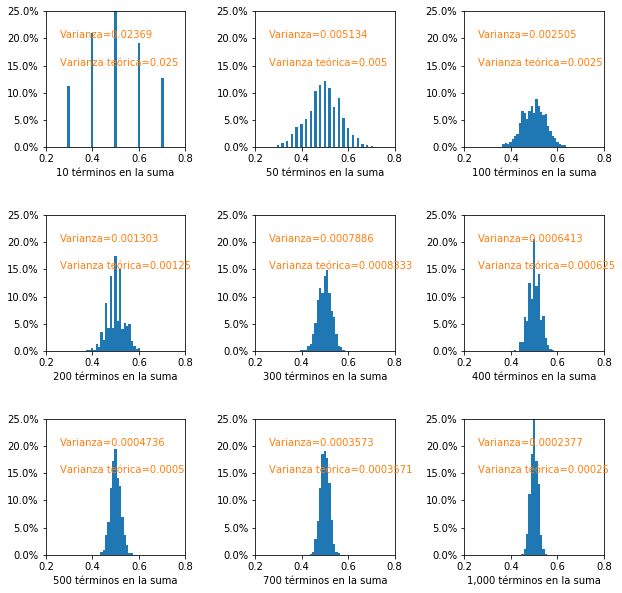

In [155]:
f = plt.figure(figsize=(10,10))
f.subplots_adjust(hspace=1, wspace=1)
ax1 = f.add_subplot(331)
ax2 = f.add_subplot(332)
ax3 = f.add_subplot(333)
ax4 = f.add_subplot(334)
ax5 = f.add_subplot(335)
ax6 = f.add_subplot(336)
ax7= f.add_subplot(337)
ax8= f.add_subplot(338)
ax9= f.add_subplot(339)
f.subplots_adjust(hspace=.5, wspace=0.5)
lista_axes=f.get_axes()
N_bins=np.linspace(0,1,100)
n_decimales=2
#lista_graficas=list(itertools.product(lista_columnas[1:],lista_columnas[1:]))
for i in range(0,9):
    #grafico=lista_graficas[i]
    #lista=np.array(list(itertools.product(range(1,5),range(1,5))))
    #lista_axes[i].set_xticks([1,2,3,4])
    #lista_axes[i].set_yticks([1,2,3,4])
    lista_axes[i].set_xlabel('{:,} términos en la suma'.format(lista_terms_sum[i]))
    lista_axes[i].yaxis.set_major_formatter(PercentFormatter(1))
    #lista_axes[i].set_xlim(series[lista_exp[i]].min(),series[lista_exp[i]].max())
    lista_axes[i].set_xlim(0.2,0.8)
    lista_axes[i].set_ylim(0.0,0.25)
    #lista_axes[i].set_ylabel(grafico[1])                                       
    #x,y=lista.T
    #s=[contador[i,j]*5 for i,j in lista]
    #lista_axes[i].scatter(x,y,s=s,c=s)
    counts, bins = np.histogram(np.around(series[lista_terms_sum[i]],decimals=n_decimales),bins=N_bins)
    lista_axes[i].hist(bins[:-1],bins,weights=counts/counts.sum())
    lista_axes[i].text(0.1,0.8,'Varianza={:.4}'.format(varianza[i]),transform=lista_axes[i].transAxes,color='tab:orange')
    lista_axes[i].text(0.1,0.6,'Varianza teórica={:.4}'.format(var_teorica[i]),transform=lista_axes[i].transAxes,color='tab:orange')
    #lista_axes[i].hist(series[lista_terms_sum[i]],bins=50,density=1)

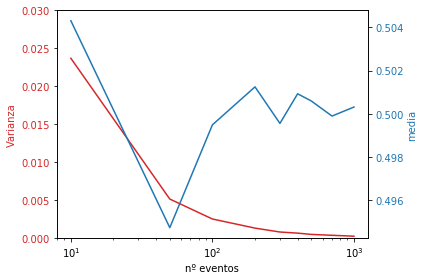

In [151]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xscale('log', basex=10)
ax1.set_xlabel('nº eventos')
ax1.set_ylabel('Varianza', color=color)
ax1.set_ylim(0,0.03)
ax1.plot(list(series.keys()),varianza, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('media', color=color)  # we already handled the x-label with ax1
ax2.plot(list(series.keys()),media, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()